In [ ]:
import torch
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt


import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.transforms import ToTensor

In [ ]:
# загружаем датасет
train_dataset = dataset = datasets.CIFAR100(root = "./data",
						train = True,
						download = True)

100%|██████████| 169001437/169001437 [00:02<00:00, 79259909.31it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data


In [ ]:
# функция для приобразования картинок в нужный формат
def create_x(x):
  x = np.reshape(x, (3, 32, 32))
  x = np.array(x, dtype=np.float32)
  x = x/255.0
  # преобразование массива пикселей в торч(тип данных для работы с petorch)
  x = torch.from_numpy(x)
  return x

In [ ]:
# функция для фильтрации. в датасете все классы имеют свои номера, и мы по номерам фильтруем
def give_dy_classes(dataset):
  data = []
  label = []
  ds = []
  for x, y in dataset:
    if y == 79 :         # класс пауков
      data.append(create_x(x))
      label.append(0)
      ds.append((create_x(x),torch.tensor(0)))
    elif y == 26:        # класс крабов
      data.append(create_x(x))
      label.append(1)
      ds.append((create_x(x),torch.tensor(1)))
  return data, label, ds

In [ ]:
len(train_dataset)

50000

In [ ]:
data, label, ds = give_dy_classes(train_dataset)

In [ ]:
# dsdjl hfpvthyjcnb rfhnbyrb
print(data[0].shape)

torch.Size([3, 32, 32])


In [ ]:
len(ds)

1000

In [ ]:
batch_size = 32

In [ ]:
# разделение полученных данных на треннеровачной и тестовой выбоки

# тренеровочная для обучения модели, а тестовая, та на которй мы смотрим, как точно обучает наша модель
import random
ds = random.sample(ds, len(ds))

train_loader = torch.utils.data.DataLoader(ds[:8000],
                                         batch_size = batch_size,
                                         drop_last = False)

test_loader = torch.utils.data.DataLoader(ds[8000:], batch_size = batch_size,drop_last = False)

In [ ]:
# создание сверточной модели
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # сверточные слои
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        # полносвязные слои
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    # склейка слоев в модель
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# создание объектов модели
model = Net()

model

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [ ]:
# для обучения указываем функцию потеть
criterion = nn.CrossEntropyLoss()

# указываем оптимизатор и его параметры
optimizer = torch.optim.SGD(model.parameters(), lr= 0.1)

In [ ]:
# фцнкция для обучения модели
def fit(model, criterion, optimizer, train_loader):
  n_epochs = 50
  loss_trn = []
  acc_trn = []

  for epoch in range(1, n_epochs+1):
      train_loss = 0.0
      correct = 0.0
      total = 0

      for data ,true_img  in train_loader:
          noise_img = data
          optimizer.zero_grad()

          outputs = model(noise_img)

          loss = criterion(outputs, true_img)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()*true_img.size(0)

          total += true_img.size(0)
          _, predicted = torch.max(outputs.data, 1)
          correct += (predicted == true_img).sum().item()

      train_loss = train_loss/len(train_loader)/100
      correct = 100. * correct / total
      loss_trn.append(train_loss)
      acc_trn.append(correct)
      print('Epoch: {} \tTraining Loss: {:.6f} \tAccurasu: {:.2f}%'.format(epoch, train_loss, correct))
  return loss_trn, acc_trn

In [ ]:
loss_trn, acc_trn = fit(model, criterion, optimizer, train_loader)

Epoch: 1 	Training Loss: 0.216281 	Accurasu: 53.00%
Epoch: 2 	Training Loss: 0.215393 	Accurasu: 52.70%
Epoch: 3 	Training Loss: 0.213333 	Accurasu: 56.50%
Epoch: 4 	Training Loss: 0.209653 	Accurasu: 59.60%
Epoch: 5 	Training Loss: 0.211620 	Accurasu: 60.10%
Epoch: 6 	Training Loss: 0.212200 	Accurasu: 58.40%
Epoch: 7 	Training Loss: 0.210373 	Accurasu: 61.30%
Epoch: 8 	Training Loss: 0.207495 	Accurasu: 60.50%
Epoch: 9 	Training Loss: 0.203647 	Accurasu: 62.00%
Epoch: 10 	Training Loss: 0.207133 	Accurasu: 61.10%
Epoch: 11 	Training Loss: 0.210244 	Accurasu: 60.30%
Epoch: 12 	Training Loss: 0.196867 	Accurasu: 65.40%
Epoch: 13 	Training Loss: 0.221081 	Accurasu: 56.90%
Epoch: 14 	Training Loss: 0.205481 	Accurasu: 62.50%
Epoch: 15 	Training Loss: 0.195749 	Accurasu: 67.10%
Epoch: 16 	Training Loss: 0.201470 	Accurasu: 65.50%
Epoch: 17 	Training Loss: 0.209614 	Accurasu: 62.40%
Epoch: 18 	Training Loss: 0.195292 	Accurasu: 68.50%
Epoch: 19 	Training Loss: 0.192996 	Accurasu: 68.70%
Ep

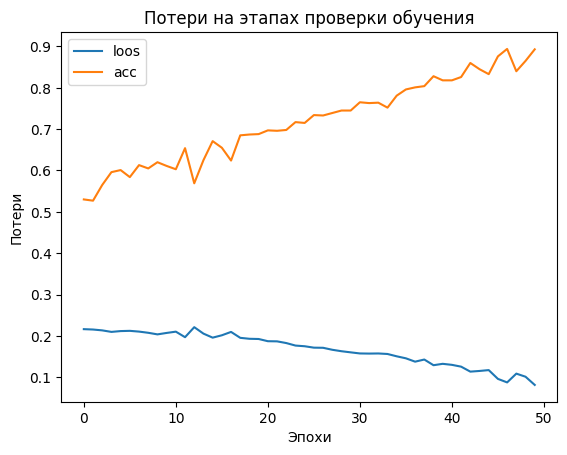

In [ ]:
# вывод параметров точности и потерь(точность должна быть максимально большей и стремится к 1, т.е. к 100% , а потери стремятся к мин значению, т.е. к 0)
plt.plot(loss_trn[0:])
plt.plot(np.array(acc_trn[0:])/100)
plt.title('Потери на этапах проверки обучения')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['loos', 'acc'], loc='upper left')
plt.show()